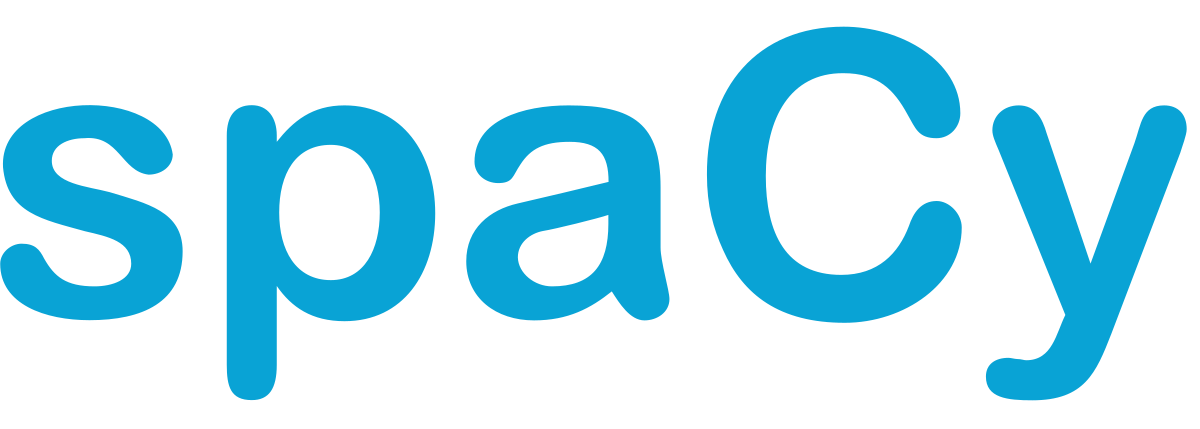

### What is spaCy?

* Open Source Natural Language Processing Library

* Designed to effectively handle NLP tasks with the ***most efficient implementation of common algoritm*** ,Which means for many NLP tasks, Spacy only has ***one*** implemented method, choosing the most efficient algoritm currently available, This means you often ***don't*** have the option to choose other algoritms.

* Released on 2015

### What is  NLTK ?

* NLTK(Natural Language Toolkit) is a very popular open source package.

* Initially released in 2011, it is older than spaCy (release in 2015)

* It provides many functionalities, but includes less efficient implementations.

### NLTK vs spaCy

* For many common NLP tasks, spaCy is much faster and more efficient, at the cost of the user not being able to choose algoritmic implementations.

* However, spaCy does not include pre-created models for some applications, such as sentiment analysis, which is typically easier to perform with NLTK.

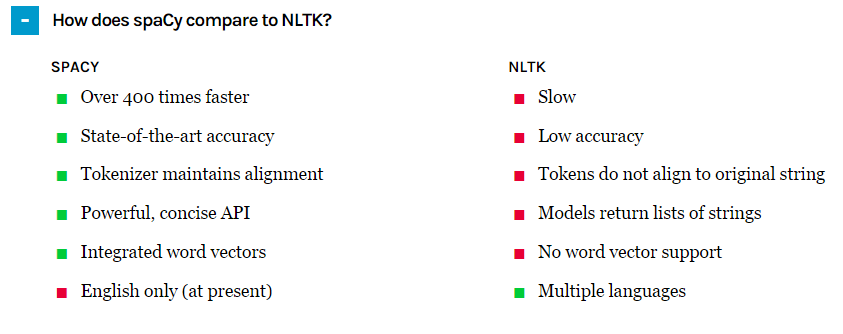

# Installation and Setup

Installation is a two-step process. First, install spaCy using either conda or pip. Next, download the specific model you want, based on language.<br> For more info visit https://spacy.io/usage/

### 1. From the command line or terminal:
> `conda install -c conda-forge spacy`
> <br>*or*<br>
> `pip install -U spacy`

> ### Alternatively you can create a virtual environment:
> `conda create -n spacyenv python=3 spacy=2`

### 2. Next, also from the command line (you must run this as admin or use sudo):

> `python -m spacy download en`

> ### If successful, you should see a message like:

> **`Linking successful`**<br>
> `    C:\Anaconda3\envs\spacyenv\lib\site-packages\en_core_web_sm -->`<br>
> `    C:\Anaconda3\envs\spacyenv\lib\site-packages\spacy\data\en`<br>
> ` `<br>
> `    You can now load the model via spacy.load('en')`


# Working with spaCy in Python

This is a typical set of instructions for importing and working with spaCy. Don't be surprised if this takes awhile - spaCy has a fairly large library to load:

In [1]:
# Import spaCy and load the language library
import spacy
# Loading English language
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(u'Tesla is looking at buying U.S. startup for $6 million')

# Print each token separately
for token in doc:
    print(token.text, token.pos_, token.dep_)

Tesla PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.S. PROPN compound
startup NOUN dobj
for ADP prep
$ SYM quantmod
6 NUM compound
million NUM pobj


This doesn't look very user-friendly, but right away we see some interesting things happen:
1. Tesla is recognized to be a Proper Noun, not just a word at the start of a sentence
2. U.S. is kept together as one entity (we call this a 'token')

As we dive deeper into spaCy we'll see what each of these abbreviations mean and how they're derived. We'll also see how spaCy can interpret the last three tokens combined `$6 million` as referring to ***money***.

___
# Pipeline
When we run `nlp`, our text enters a *processing pipeline* that first breaks down the text and then performs a series of operations to tag, parse and describe the data.   Image source: https://spacy.io/usage/spacy-101#pipelines

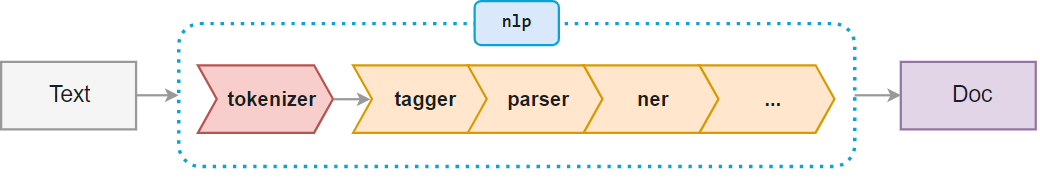

We can check to see what components currently live in the pipeline. In later sections we'll learn how to disable components and add new ones as needed.

In [2]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x24676907ef0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x24676936e00>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x24676905280>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x24676749f40>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x24676912dc0>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x246768e7240>)]

In [3]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'ner', 'attribute_ruler', 'lemmatizer']

___
## Tokenization
The first step in processing text is to split up all the component parts (words & punctuation) into "tokens". These tokens are annotated inside the Doc object to contain descriptive information.

In [4]:
doc2 = nlp(u"Tesla isn't   looking into startups anymore.")

for token in doc2:
    print(token.text, token.pos_, token.dep_)

Tesla PROPN nsubj
is AUX aux
n't PART neg
   SPACE nsubj
looking VERB ROOT
into ADP prep
startups NOUN pobj
anymore ADV advmod
. PUNCT punct


Notice how `isn't` has been split into two tokens. spaCy recognizes both the root verb `is` and the negation attached to it. Notice also that both the extended whitespace and the period at the end of the sentence are assigned their own tokens.

It's important to note that even though `doc2` contains processed information about each token, it also retains the original text:

In [5]:
doc2

Tesla isn't   looking into startups anymore.

Since we are iterating over the tokens, we can actually index our tokens.

In [6]:
doc2[0] # Try doc2[0].pos_, doc2[0].text

Tesla

In [7]:
type(doc2)

spacy.tokens.doc.Doc

___
## Part-of-Speech Tagging (POS)
The next step after splitting the text up into tokens is to assign parts of speech. In the above example, `Tesla` was recognized to be a ***proper noun***. Here some statistical modeling is required. For example, words that follow "the" are typically nouns.

For a full list of POS Tags visit https://spacy.io/api/annotation#pos-tagging

In [8]:
doc2[0].pos_

'PROPN'

___
## Dependencies
We also looked at the syntactic dependencies assigned to each token. `Tesla` is identified as an `nsubj` or the ***nominal subject*** of the sentence.

For a full list of Syntactic Dependencies visit https://spacy.io/api/annotation#dependency-parsing
<br>A good explanation of typed dependencies can be found [here](https://nlp.stanford.edu/software/dependencies_manual.pdf)

In [9]:
doc2[0].dep_

'nsubj'

To see the full name of a tag use `spacy.explain(tag)`

In [10]:
spacy.explain('PROPN')

'proper noun'

In [11]:
spacy.explain('nsubj')

'nominal subject'

___
## Additional Token Attributes
We'll see these again in upcoming lectures. For now we just want to illustrate some of the other information that spaCy assigns to tokens:

|Tag|Description|doc2[0].tag|
|:------|:------:|:------|
|`.text`|The original word text<!-- .element: style="text-align:left;" -->|`Tesla`|
|`.lemma_`|The base form of the word|`tesla`|
|`.pos_`|The simple part-of-speech tag|`PROPN`/`proper noun`|
|`.tag_`|The detailed part-of-speech tag|`NNP`/`noun, proper singular`|
|`.shape_`|The word shape – capitalization, punctuation, digits|`Xxxxx`|
|`.is_alpha`|Is the token an alpha character?|`True`|
|`.is_stop`|Is the token part of a stop list, i.e. the most common words of the language?|`False`|

In [12]:
# Lemmas (the base form of the word):
print(doc2[4].text)
print(doc2[4].lemma_)

looking
look


In [13]:
# Simple Parts-of-Speech & Detailed Tags:
print(doc2[4].pos_)
print(doc2[4].tag_ + ' / ' + spacy.explain(doc2[4].tag_))

VERB
VBG / verb, gerund or present participle


In [14]:
# Word Shapes:
print(doc2[0].text+': '+doc2[0].shape_)
print(doc[5].text+' : '+doc[5].shape_)

Tesla: Xxxxx
U.S. : X.X.


In [15]:
# Boolean Values:
print(doc2[0].is_alpha)
print(doc2[0].is_stop)

True
False


___
## Spans
Large Doc objects can be hard to work with at times. A **span** is a slice of Doc object in the form `Doc[start:stop]`.

In [16]:
doc3 = nlp(u'Although commmonly attributed to John Lennon from his song "Beautiful Boy", \
the phrase "Life is what happens to us while we are making other plans" was written by \
cartoonist Allen Saunders and published in Reader\'s Digest in 1957, when Lennon was 17.')

In [17]:
life_quote = doc3[16:30]
print(life_quote)

"Life is what happens to us while we are making other plans"


In [18]:
type(life_quote)

spacy.tokens.span.Span

___
## Sentences
Certain tokens inside a Doc object may also receive a "start of sentence" tag. While this doesn't immediately build a list of sentences, these tags enable the generation of sentence segments through `Doc.sents`. We can also write our own segmentation rule, but that is for later ;)

In [19]:
doc4 = nlp(u'This is the first sentence. This is another sentence. This is the last sentence.')

In [20]:
for sent in doc4.sents:
    print(sent)

This is the first sentence.
This is another sentence.
This is the last sentence.


In [21]:
doc4[6].is_sent_start

True

___

# Tokenization
* Tokenization is the process of breaking up the original text into component pieces (tokens)

In [22]:

# Create a string that includes opening and closing quotation marks
mystring = '"We\'re moving to L.A.!"'
print(mystring)

"We're moving to L.A.!"


In [23]:
# Create a Doc object and explore tokens
doc1 = nlp(mystring)

for token in doc1:
    print(token.text, end=' | ')

" | We | 're | moving | to | L.A. | ! | " | 

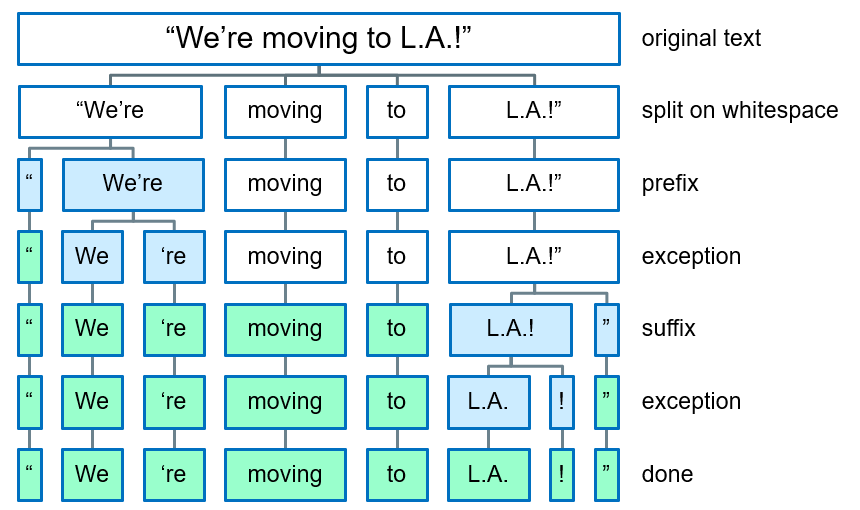

-  **Prefix**:	Character(s) at the beginning &#9656; `$ ( “ ¿`
-  **Suffix**:	Character(s) at the end &#9656; `km ) , . ! ”`
-  **Infix**:	Character(s) in between &#9656; `- -- / ...`
-  **Exception**: Special-case rule to split a string into several tokens or prevent a token from being split when punctuation rules are applied &#9656; `St. U.S.`

Notice that tokens are pieces of the original text. That is, we don't see any conversion to word stems or lemmas (base forms of words) and we haven't seen anything about organizations/places/money etc. Tokens are the basic building blocks of a Doc object - everything that helps us understand the meaning of the text is derived from tokens and their relationship to one another.

## Prefixes, Suffixes and Infixes
spaCy will isolate punctuation that does *not* form an integral part of a word. Quotation marks, commas, and punctuation at the end of a sentence will be assigned their own token. However, punctuation that exists as part of an email address, website or numerical value will be kept as part of the token.

In [24]:
doc2 = nlp(u"We're here to help! Send snail-mail, email support@becode.org or visit us at http://www.becode.org!")

for t in doc2:
    print(t)

We
're
here
to
help
!
Send
snail
-
mail
,
email
support@becode.org
or
visit
us
at
http://www.becode.org
!


<font color=blue>Note that the exclamation points, comma, and the hyphen in 'snail-mail' are assigned their own tokens, yet both the email address and website are preserved.</font>

In [25]:
doc3 = nlp(u'A 5km NYC cab ride costs $10.30')

for t in doc3:
    print(t)

A
5
km
NYC
cab
ride
costs
$
10.30


<font color=green>Here the distance unit and dollar sign are assigned their own tokens, yet the dollar amount is preserved.</font>

## Exceptions
Punctuation that exists as part of a known abbreviation will be kept as part of the token.

In [26]:
doc4 = nlp(u"Let's visit St. Louis in the U.S. next year.")

for t in doc4:
    print(t)

Let
's
visit
St.
Louis
in
the
U.S.
next
year
.


<font color=orange>Here the abbreviations for "Saint" and "United States" are both preserved.</font>

## Counting Tokens
`Doc` objects have a set number of tokens:

In [27]:
len(doc4)

11

## Counting Vocab Entries
`Vocab` objects contain a full library of items!

In [28]:
len(doc4.vocab)

832

## Tokens can be retrieved by index position and slice
`Doc` objects can be thought of as lists of `token` objects. As such, individual tokens can be retrieved by index position, and spans of tokens can be retrieved through slicing:

In [29]:
doc5 = nlp(u'It is better to give than to receive.')

# Retrieve the third token:
doc5[2]

better

In [30]:
# Retrieve three tokens from the middle:
doc5[2:5]

better to give

In [31]:
# Retrieve the last four tokens:
doc5[-4:]

than to receive.

## Tokens cannot be reassigned
Although `Doc` objects can be considered lists of tokens, they do *not* support item reassignment:

In [32]:
doc6 = nlp(u'My dinner was horrible.')
doc7 = nlp(u'Your dinner was delicious.')

In [33]:
# Try to change "My dinner was horrible" to "My dinner was delicious"
doc6[3] = doc7[3]

TypeError: 'spacy.tokens.doc.Doc' object does not support item assignment

___
# Named Entities
Going a step beyond tokens, *named entities* add another layer of context. The language model recognizes that certain words are organizational names while others are locations, and still other combinations relate to money, dates, etc. Named entities are accessible through the `ents` property of a `Doc` object.

In [34]:
doc8 = nlp(u'Apple to build a Hong Kong factory for $6 million')

for token in doc8:
    print(token.text, end=' | ')

print('\n----')

for ent in doc8.ents:
    print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

Apple | to | build | a | Hong | Kong | factory | for | $ | 6 | million | 
----
Apple - ORG - Companies, agencies, institutions, etc.
Hong Kong - GPE - Countries, cities, states
$6 million - MONEY - Monetary values, including unit


<font color=green>Note how two tokens combine to form the entity `Hong Kong`, and three tokens combine to form the monetary entity:  `$6 million`</font>

In [35]:
len(doc8.ents)

3

Named Entity Recognition (NER) is an important machine learning tool applied to Natural Language Processing.<br> For more info on **named entities** visit https://spacy.io/usage/linguistic-features#named-entities

---
# Noun Chunks
Similar to `Doc.ents`, `Doc.noun_chunks` are another object property. *Noun chunks* are "base noun phrases" – flat phrases that have a noun as their head. You can think of noun chunks as a noun plus the words describing the noun – for example, in [Sheb Wooley's 1958 song](https://en.wikipedia.org/wiki/The_Purple_People_Eater), a *"one-eyed, one-horned, flying, purple people-eater"* would be one long noun chunk.

In [36]:
doc9 = nlp(u"Autonomous cars shift insurance liability toward manufacturers.")

for chunk in doc9.noun_chunks:
    print(chunk.text)

Autonomous cars
insurance liability
manufacturers


In [37]:
doc10 = nlp(u"Red cars do not carry higher insurance rates.")

for chunk in doc10.noun_chunks:
    print(chunk.text)

Red cars
higher insurance rates


In [38]:
doc11 = nlp(u"He was a one-eyed, one-horned, flying, purple people-eater.")

for chunk in doc11.noun_chunks:
    print(chunk.text)

He
purple people-eater


For more info on **noun_chunks** visit https://spacy.io/usage/linguistic-features#noun-chunks

___
# Built-in Visualizers

spaCy includes a built-in visualization tool called **displaCy**. displaCy is able to detect whether you're working in a Jupyter notebook, and will return markup that can be rendered in a cell right away. When you export your notebook, the visualizations will be included as HTML.

For more info visit https://spacy.io/usage/visualizers

## Visualizing the dependency parse
Run the cell below to import displacy and display the dependency graphic

In [39]:
from spacy import displacy

doc = nlp(u'Apple is going to build a U.K. factory for $6 million.')
displacy.render(doc, style='dep', jupyter=True, options={'distance': 110})

The optional `'distance'` argument sets the distance between tokens. If the distance is made too small, text that appears beneath short arrows may become too compressed to read.

## Visualizing the entity recognizer

In [40]:
doc = nlp(u'Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million.')
displacy.render(doc, style='ent', jupyter=True)

___
## Creating Visualizations Outside of Jupyter
If you're using another Python IDE or writing a script, you can choose to have spaCy serve up html separately:

In [41]:
doc = nlp(u'This is a sentence.')
displacy.serve(doc, style='dep')

C:\Users\Idree\.conda\envs\House\lib\site-packages\spacy\displacy\__init__.py:97: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


<font color=blue>**After running the cell above, click the link below to view the dependency parse**:</font>

http://127.0.0.1:5000
<br><br>
<font color=red>**To shut down the server and return to jupyter**, interrupt the kernel either through the **Kernel** menu above, by hitting the black square on the toolbar, or by typing the keyboard shortcut `Esc`, `I`, `I`</font>

Great! Now you should have an understanding of how tokenization divides text up into individual elements, how named entities provide context, and how certain tools help to visualize grammar rules and entity labels.

The Next step from here will be Stemming what i will be beyong the scope of my Research as i wanted to narrow spaCy only to the point of Basics + Tokenization.

Author: Idrees iqbal

Coach: Ibe denaux

Becode.org